In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import statsmodels.api as sm

insurance_df = pd.read_csv('Data/insurance.csv')
insurance_df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [2]:
features = ['age']

X = sm.add_constant(insurance_df[features])
y = insurance_df['charges']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.089
Model:                            OLS   Adj. R-squared:                  0.089
Method:                 Least Squares   F-statistic:                     131.2
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           4.89e-29
Time:                        09:50:13   Log-Likelihood:                -14415.
No. Observations:                1338   AIC:                         2.883e+04
Df Residuals:                    1336   BIC:                         2.884e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3165.8850    937.149      3.378      0.001    1327.440    5004.330
age          257.7226     22.502     11.453      0.000     213.579     301.866
==============================================================================
Omnibus:                      399.600   Durbin-Watson:                   2.033
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              864.239
Skew:                           1.733   Prob(JB):                    2.15e-188
Kurtosis:                       4.869   Cond. No.                         124.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Explination of what the model.summary() returns.

you’re looking at the output of a linear regression model summary from statsmodels. This is basically a statistical autopsy of how well your chosen feature(s)—in this case, age—predict the target variable charges (medical insurance cost). Let’s unpack the important pieces from the screenshot:  

---

**Top Section: General Model Info**  
* **Dep. Variable: charges** The dependent variable (the thing we’re trying to predict) is charges.
* **Model: OLS** OLS = Ordinary Least Squares regression, the standard linear regression method.
* **Method: Least Squares** Confirms that coefficients were estimated by minimizing squared errors.
* **No. Observations: 1338** Number of data points (rows).
* **Df Residuals: 1336** Degrees of freedom left after estimating parameters. (Total data – estimated parameters).
* **Df Model: 1** Number of predictors (just age in this case).

---

**Fit Statistics**
* **R-squared: 0.089** About 8.9% of the variation in charges is explained by age. This is very low, meaning age alone isn’t a strong predictor of insurance charges.
* **Adj. R-squared: 0.089** Adjusted for the number of predictors (same here since only one predictor).
* **F-statistic: 131.2 & Prob (F-statistic): 4.89e-29** Tests if your model as a whole is meaningful. Very small p-value (<0.05) → age is statistically significant.

---

**Coefficients Table**
This is the meat of the regression.  

|  Term | coef | std err | t | P>|t| | [0.025 | 0.975] |  
|-------|------|---------|---|-------|--------|--------|  
| const | 3165.8850 | 937.149 | 3.378 | 0.001 | 1327.440 | 5004.330 |  
| age | 257.7226 | 22.502 | 11.453 | 0.000 | 213.579 | 301.866 |  

* **const (3165.8850):** This is the intercept. If age = 0, predicted charges ≈ $3165.
* **age (257.7226):** Each additional year of age increases insurance charges by about $257 on average, holding everything else constant.
* **P>|t|:** p-value. Very small (<0.05), meaning the coefficients are statistically significant.
* **[0.025, 0.975]:** Confidence interval for the coefficient. For age, the true value is very likely between 213.6 and 301.9.

---

**Diagnostics**  
* **Omnibus, Prob(Omnibus), Jarque-Bera, Skew, Kurtosis:** These test whether residuals (errors) are normally distributed. Here, p-values are basically zero → residuals are not normal, suggesting model misfit.
* **Durbin-Watson: 2.033:** Tests for autocorrelation in residuals. ~2 means no serious autocorrelation (good).
* **Cond. No: 124:** Tests multicollinearity (predictors being too correlated). Low number = no issue here.

---

**TL;DR**  
* Age is statistically significant in predicting insurance charges.
* For every extra year, charges increase by about **$258.**
* But **age explains only ~9% of the variance.** That’s weak. Other factors (like smoker status, BMI, region) probably matter much more.

---

Think of this as: age matters, but it’s not the whole story—smoking might blow the prediction wide open.

<Axes: ylabel='None'>

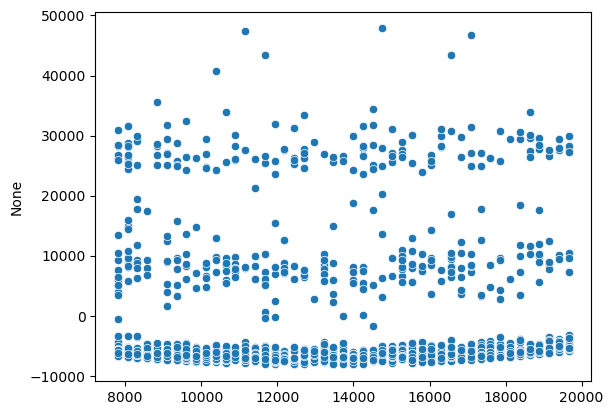

In [3]:
sns.scatterplot(x=model.predict(), y=model.resid)

In [8]:
# Changing the parameters:

features = ['age', 'bmi', 'children']

X = sm.add_constant(insurance_df[features])
y = insurance_df['charges']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     60.69
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           8.80e-37
Time:                        09:55:30   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.879e+04
Df Residuals:                    1334   BIC:                         2.881e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6916.2433   1757.480     -3.935      0.000   -1.04e+04   -3468.518
age          239.9945     22.289     10.767      0.000     196.269     283.720
bmi          332.0834     51.310      6.472      0.000     231.425     432.741
children     542.8647    258.241      2.102      0.036      36.261    1049.468
==============================================================================
Omnibus:                      325.395   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              603.372
Skew:                           1.520   Prob(JB):                    9.54e-132
Kurtosis:                       4.255   Cond. No.                         290.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<Axes: ylabel='None'>

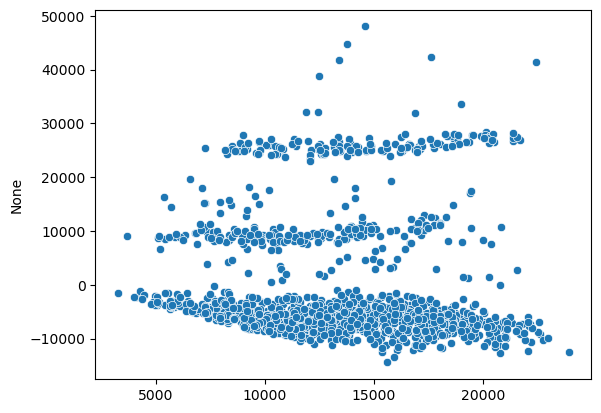

In [5]:
sns.scatterplot(x=model.predict(), y=model.resid)

In [6]:
new_data = pd.DataFrame({
    'age': [0, insurance_df['age'].min(), insurance_df['age'].mean(), insurance_df['age'].max()],
    'bmi': [0, insurance_df['bmi'].min(), insurance_df['bmi'].mean(), insurance_df['bmi'].max()],
})

new_data

,age,bmi
0,0.000000,0.000000
1,18.000000,15.960000
2,39.207025,30.663397
3,64.000000,53.130000


In [7]:
X = sm.add_constant(new_data)
model.predict(X)

0    -6424.804612
1     3244.072239
2    13270.422265
3    26749.200448
dtype: float64

In [ ]:
'''
insurance_df = insurance_df.assign(
    smoker_flag=np.where(insurance_df['smoker'] == 'yes', 1, 0),
    female_flag=np.where(insurance_df['sex'] == 'female', 1, 0)
)

# cant see
X = sm.add_constant(insurance_df[['age', 'bmi', 'children', 'smoker_flag']])
'''

## Mean Error Metrics

In [11]:
from sklearn.metrics import mean_absolute_error as mae
from sklearn.metrics import mean_squared_error as rmse # in future use root_mean_squared_error
from sklearn.metrics import r2_score as r2

print(f"MAE: {mae(y, model.predict())}")
print(f"RMSE: {rmse(y, model.predict(), squared=False)}") # in future use root_mean_squared_error(y, model.predict())
print(f"R2: {r2(y, model.predict())}")

MAE: 9015.442199156741
RMSE: 11355.317901125973
R2: 0.12009819576246927


C:\Users\Camilo\anaconda3\Lib\site-packages\sklearn\metrics\_regression.py:492: FutureWarning: 'squared' is deprecated in version 1.4 and will be removed in 1.6. To calculate the root mean squared error, use the function'root_mean_squared_error'.
  warnings.warn(


## Adjusted R-Squared

In [13]:
import numpy as np

rng = np.random.default_rng(12345)

insurance_df = insurance_df.assign(
    rand_col = rng.random(len(insurance_df)),
    rand_col2 = rng.random(len(insurance_df)),
    rand_col3 = rng.random(len(insurance_df))
)

insurance_df.corr(numeric_only=True)


,age,bmi,children,charges,rand_col,rand_col2,rand_col3
age,1.000000,0.109272,0.042469,0.299008,0.020021,-0.007233,0.042163
bmi,0.109272,1.000000,0.012759,0.198341,0.001058,-0.035852,0.020356
children,0.042469,0.012759,1.000000,0.067998,-0.018889,-0.022124,0.011921
charges,0.299008,0.198341,0.067998,1.000000,0.000051,-0.024096,0.024252
rand_col,0.020021,0.001058,-0.018889,0.000051,1.000000,0.004616,0.008671
rand_col2,-0.007233,-0.035852,-0.022124,-0.024096,0.004616,1.000000,0.017253
rand_col3,0.042163,0.020356,0.011921,0.024252,0.008671,0.017253,1.000000


In [16]:
features = ['age', 'bmi', 'children', 'rand_col', 'rand_col2', 'rand_col3'] # rand_col is a useless column

X = sm.add_constant(insurance_df[features])
y = insurance_df['charges']

model = sm.OLS(y, X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                charges   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.116
Method:                 Least Squares   F-statistic:                     30.37
Date:                Tue, 07 Oct 2025   Prob (F-statistic):           2.71e-34
Time:                        13:29:48   Log-Likelihood:                -14392.
No. Observations:                1338   AIC:                         2.880e+04
Df Residuals:                    1331   BIC:                         2.883e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -6629.2597   1989.399     -3.332      0.001   -1.05e+04   -2726.560
age          239.7440     22.332     10.735      0.000     195.934     283.554
bmi          330.7414     51.398      6.435      0.000     229.912     431.570
children     537.7850    258.610      2.080      0.038      30.458    1045.112
rand_col    -199.4276   1093.587     -0.182      0.855   -2344.770    1945.915
rand_col2   -630.4767   1077.445     -0.585      0.559   -2744.153    1483.199
rand_col3    376.5479   1101.791      0.342      0.733   -1784.888    2537.984
==============================================================================
Omnibus:                      324.666   Durbin-Watson:                   2.012
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              601.110
Skew:                           1.519   Prob(JB):                    2.96e-131
Kurtosis:                       4.248   Cond. No.                         341.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""